In [1]:
from my_ANN import initialize_params, forward, compute_cost, backward, update_params

import numpy as np
import matplotlib.pyplot as plt

# File H5

In [2]:
import h5py

h5_fileName1 = 'train_catvnoncat.h5'
h5_fileName2 = 'test_catvnoncat.h5'

train_dataset = h5py.File(h5_fileName1, 'r')
test_dataset = h5py.File(h5_fileName2, 'r')

In [3]:
for item in train_dataset.keys():
    print(item, ':', train_dataset[item])

list_classes : <HDF5 dataset "list_classes": shape (2,), type "|S7">
train_set_x : <HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
train_set_y : <HDF5 dataset "train_set_y": shape (209,), type "<i8">


In [4]:
for item in test_dataset.keys():
    print(item, ':', test_dataset[item])

list_classes : <HDF5 dataset "list_classes": shape (2,), type "|S7">
test_set_x : <HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1">
test_set_y : <HDF5 dataset "test_set_y": shape (50,), type "<i8">


In [5]:
classes = np.array(test_dataset["list_classes"])
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [6]:
X_train, Y_train = np.array(train_dataset["train_set_x"]), np.array(train_dataset["train_set_y"])
X_test, Y_test = np.array(test_dataset["test_set_x"]), np.array(test_dataset["test_set_y"])

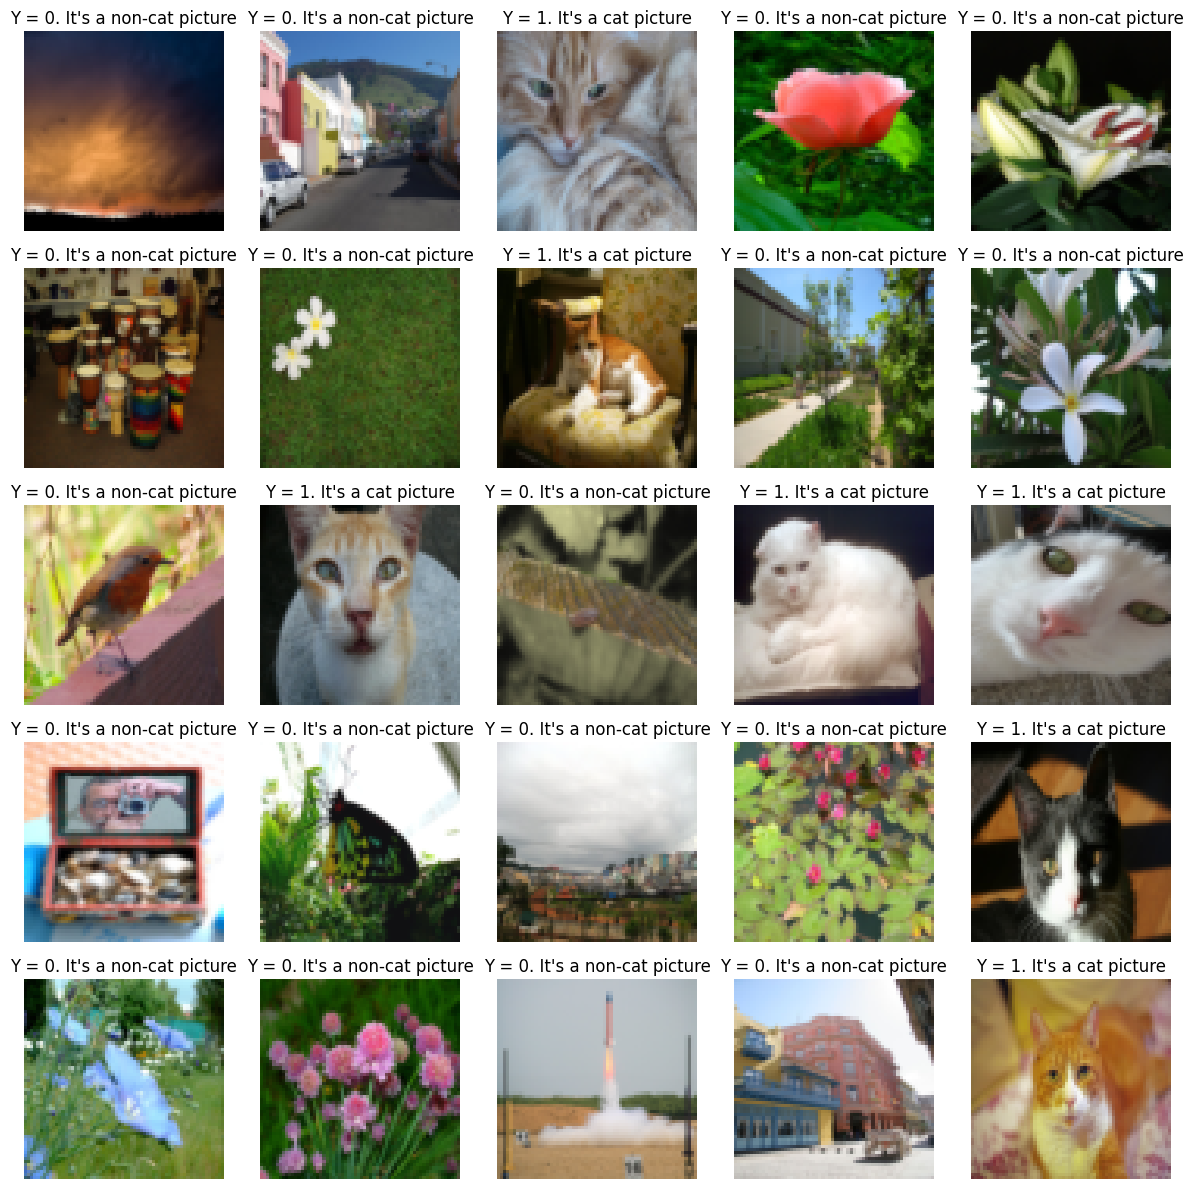

In [7]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.flatten()

for idx in range(len(axes)):
    axes[idx].imshow(X_train[idx])
    axes[idx].set_title(f"Y = {Y_train[idx]}. It's a {classes[Y_train[idx]].decode('utf-8')} picture")
    axes[idx].axis('off')  # Hide the axes

# Remove any empty subplots
for remaining_idx in range(idx+1, len(axes)):
    fig.delaxes(axes[remaining_idx])

plt.tight_layout()
plt.show()

# Preprocessing

In [8]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

X_train_flatten.shape, X_test_flatten.shape

((12288, 209), (12288, 50))

In [10]:
Y_train = Y_train.reshape(1, -1)
Y_test = Y_test.reshape(1, -1)

Y_train.shape, Y_test.shape

((1, 209), (1, 50))

# Training

In [17]:
def my_model(X_train, Y_train, layers, learning_rate=0.0075, iterations=3000):
    costs = []
    params = initialize_params(layers)
    # training
    for i in range(1, iterations+1):
        # forward pass
        Y_pred, caches = forward(X_train, params)
        # compute cost
        cost = compute_cost(Y_pred, Y_train)
        # backward pass to compute gradients
        grads = backward(Y, Y_pred, caches)
        # update parameters
        params = update_params(params, grads, learning_rate)

        # print cost
        if i % 50 == 0 or i == 1:
            costs.append(cost)
            print('Cost at Iteration {}: {}'.format(i, cost))

    return params, costs

In [13]:
n_features = X_train_flatten.shape[0]
layers = [n_features, 7, 1]

In [18]:
parameters, costs = my_model(X_train_flatten, Y_train, layers=layers, iterations=1)
parameters

KeyError: 'B1'